# Predicting the Popularity of Online News

<div align="justify">The purpose of the notebook is to reproduce the work carried out by Fernandes et al. [1] to classify a news article as popular or not popular. For that, we will use a Python language with the NumPy, Pandas, and sci-kit learn libraries. The authors propose an article optimization system that we will not cover in the code below. The code uses the public data set that was made available at <a> https://archive.ics.uci.edu/ml/datasets/online+news+popularity</a>. We will follow the same steps as the authors, using five machine learning algorithms for classification.</div>

This Notebook will follow the steps below:
    <ul>
    <li>Data Preparation</li>
    <li>Classes Definition</li>
    <li>GridSearch</li>
    <li>Rolling Windows</li>
    <li>Machine Learning Classification</li>
    <li>Conclusion</li>



# Import from Libraries

In [1]:
#libraries for data manipulation
import numpy as np
import pandas as pd

#Models for Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#libraries for selecting features and parameters
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#libraries for validation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, make_scorer
from sklearn.metrics import balanced_accuracy_score

#libraries for graphics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


# Data Preparation

In [2]:
df = pd.read_csv('online_popularity.csv', sep=',')

In [3]:
# recent articles to be discarded
df_remove = df.loc[(df[' timedelta']<=21)]


In [4]:
#Discart recent articles
df = df.drop(df_remove.index)

#Discart articles until match with 39.000
for x in range(16):
  df = df.drop(39000 + x)

In [5]:
#view of columns 
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [6]:
#create Target Feature
y = df[' shares']

#remove columns url,timedelta and shares
x = df.iloc[:,2:60]
print(len(y))
print(len(x))

39000
39000


In [7]:
#new viem of columns
x.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [8]:
#view of shares
y.head()

0     593
1     711
2    1500
3    1200
4     505
Name:  shares, dtype: int64

# Classes Definition

The median of shares defined the Classes. This metric will generate two balanced sets.

In [9]:
saida_lista= []
for i in y:
    if i > 1400:
        #popular class
        saida_lista.append(1)
    else:
        #unpopular class
        saida_lista.append(0)
    
    

In [10]:
saida = pd.Series(saida_lista)
type(saida)

pandas.core.series.Series

In [11]:
saida.head()

0    0
1    0
2    1
3    0
4    0
dtype: int64

# Grid Search Parameters

In [12]:
#parameters for KNN - number of neighbors
lista_k = [1,3,5,10,20]
parametros_knn = dict(n_neighbors=lista_k)

#parameteres for RF and AdaBoost - number of trees
lista_t = [10,20,50,100,200,400]
parametros_rf = dict(n_estimators=lista_t)

#parameters for SVM
lista_c = [1,2,4,8,16,32,64]
parametros_rbf = dict(C=lista_c)

print(parametros_knn)
print(parametros_rf)
print(parametros_rbf)

{'n_neighbors': [1, 3, 5, 10, 20]}
{'n_estimators': [10, 20, 50, 100, 200, 400]}
{'C': [1, 2, 4, 8, 16, 32, 64]}


# KNN

In [54]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parametros_knn,cv=10)

In [55]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, saida, test_size=0.3)
x_treino = x_treino.dropna()
y_treino = y_treino.dropna()

In [56]:
grid.fit(x_treino,y_treino)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 20]})

In [57]:
grid.best_params_

{'n_neighbors': 20}

In [58]:
grid.best_score_

0.5738827838827838

# KNN - Prediction Rolling Windows

In [59]:
knn = KNeighborsClassifier(n_neighbors=20,p=2)
W = 10000
L = 1000
idxW = 0
idxL = idxW + W + 1

x_treino = x.iloc[idxW:W,:]
y_treino = saida.iloc[idxW:W]
x_teste =   x.iloc[idxL:(idxL+L),:]
y_teste =  saida.iloc[idxL:(idxL+L)]  
knn.fit(x_treino,y_treino)
prev_knn = knn.predict(x_teste)

idxW = idxW + L
W = idxW + 10000
idxL = idxW + 10000 + 1

for cont in range(28):
  x_treino = x.iloc[idxW:W,:]
  y_treino = saida.iloc[idxW:W]
  x_teste =   x.iloc[idxL:(idxL+L),:]
  y_teste_1 =  saida.iloc[idxL:(idxL+L)]  
  knn.fit(x_treino,y_treino)
  prev_knn_1 = knn.predict(x_teste)
  y_teste = pd.concat([y_teste,y_teste_1])  
  prev_knn = pd.concat([pd.DataFrame(prev_knn),pd.DataFrame(prev_knn_1)])
  idxW = idxW + L
  W = idxW + 10000
  idxL = idxW + 10000 + 1    




# KNN Performance

In [61]:
#fpr,tpr,thresholds = metrics.roc_curve(y_teste,prev_knn,pos_label=1)
print(f'Accuracy:  {metrics.accuracy_score(y_teste,prev_knn):.2f}')
print(f'Precision: {metrics.precision_score(y_teste,prev_knn):.2f}')
print(f'Recall:    {metrics.recall_score(y_teste,prev_knn):.2f}')
print(f'F-1 Score: {metrics.f1_score(y_teste,prev_knn):.2f}')
print(f'AUC:       {metrics.roc_auc_score(y_teste,prev_knn):.2f}')

Accuracy:  0.58
Precision: 0.58
Recall:    0.42
F-1 Score: 0.49
AUC:       0.57


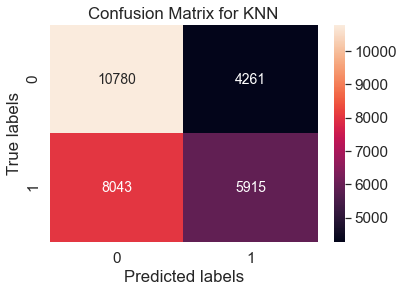

In [62]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_knn)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for KNN'); 
#ax.xaxis.set_ticklabels(['Não Popular', 'Popular']); ax.yaxis.set_ticklabels(['Não Popular', 'Popular']);

# SVM

In [13]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7)
grid = GridSearchCV(rbf_svc,parametros_rbf,cv=10)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, saida, test_size=0.3)
x_treino = x_treino.dropna()
y_treino = y_treino.dropna()

In [14]:
grid.fit(x_treino,y_treino)

GridSearchCV(cv=10, estimator=SVC(gamma=0.7),
             param_grid={'C': [1, 2, 4, 8, 16, 32, 64]})

In [15]:
grid.best_params_

{'C': 1}

In [16]:
grid.best_score_

0.5049084249084249

# SVM - Predicition Rolling Windows

In [17]:
rbf_svc = svm.SVC(C=1,kernel='rbf', gamma=0.7)

In [18]:
W = 10000
L = 1000
idxW = 0
idxL = idxW + W + 1

x_treino = x.iloc[idxW:W,:]
y_treino = saida.iloc[idxW:W]
x_teste =   x.iloc[idxL:(idxL+L),:]
y_teste =  saida.iloc[idxL:(idxL+L)]  
rbf_svc.fit(x_treino,y_treino)
prev_svm = rbf_svc.predict(x_teste)

idxW = idxW + L
W = idxW + 10000
idxL = idxW + 10000 + 1

for cont in range(28):
  x_treino = x.iloc[idxW:W,:]
  y_treino = saida.iloc[idxW:W]
  x_teste =   x.iloc[idxL:(idxL+L),:]
  y_teste_1 =  saida.iloc[idxL:(idxL+L)]  
  rbf_svc.fit(x_treino,y_treino)
  prev_svm_1 = rbf_svc.predict(x_teste)
  y_teste = pd.concat([y_teste,y_teste_1])  
  prev_svm = pd.concat([pd.DataFrame(prev_svm),pd.DataFrame(prev_svm_1)])
  idxW = idxW + L
  W = idxW + 10000
  idxL = idxW + 10000 + 1    

# SVM - Performance

In [19]:
print(f'Accuracy:  {metrics.accuracy_score(y_teste,prev_svm):.2f}')
print(f'Precision: {metrics.precision_score(y_teste,prev_svm):.2f}')
print(f'Recall:    {metrics.recall_score(y_teste,prev_svm):.2f}')
print(f'F-1 Score: {metrics.f1_score(y_teste,prev_svm):.2f}')
print(f'AUC:       {metrics.roc_auc_score(y_teste,prev_svm):.2f}')

Accuracy:  0.50
Precision: 0.48
Recall:    0.55
F-1 Score: 0.52
AUC:       0.50


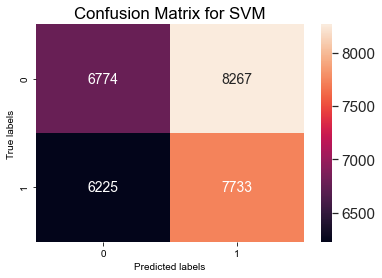

In [20]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_svm)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM'); 

# Random Forest

In [21]:
rf = RandomForestClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=10,
                           n_estimators=50,
                           n_jobs=-1)

grid = GridSearchCV(rf,parametros_rf,cv=10)

In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, saida, test_size=0.3)
x_treino = x_treino.dropna()
y_treino = y_treino.dropna()

In [23]:
grid.fit(x_treino,y_treino)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=50,
                                              n_jobs=-1, random_state=1986),
             param_grid={'n_estimators': [10, 20, 50, 100, 200, 400]})

In [24]:
grid.best_params_

{'n_estimators': 200}

In [25]:
grid.best_score_

0.6661172161172162

# Random Forest - Prediction Rolling Windows

In [26]:
rf = RandomForestClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=10,
                           n_estimators=200,
                           n_jobs=-1)

In [27]:
W = 10000
L = 1000
idxW = 0
idxL = idxW + W + 1

x_treino = x.iloc[idxW:W,:]
y_treino = saida.iloc[idxW:W]
x_teste =   x.iloc[idxL:(idxL+L),:]
y_teste =  saida.iloc[idxL:(idxL+L)]  
rf.fit(x_treino,y_treino)
prev_rf = rf.predict(x_teste)

idxW = idxW + L
W = idxW + 10000
idxL = idxW + 10000 + 1

for cont in range(28):
  x_treino = x.iloc[idxW:W,:]
  y_treino = saida.iloc[idxW:W]
  x_teste =   x.iloc[idxL:(idxL+L),:]
  y_teste_1 =  saida.iloc[idxL:(idxL+L)]  
  rf.fit(x_treino,y_treino)
  prev_rf_1 = rf.predict(x_teste)
  y_teste = pd.concat([y_teste,y_teste_1])  
  prev_rf = pd.concat([pd.DataFrame(prev_rf),pd.DataFrame(prev_rf_1)])
  idxW = idxW + L
  W = idxW + 10000
  idxL = idxW + 10000 + 1  

# Random Forest - Performance

In [28]:
print(f'Accuracy:  {metrics.accuracy_score(y_teste,prev_rf):.2f}')
print(f'Precision: {metrics.precision_score(y_teste,prev_rf):.2f}')
print(f'Recall:    {metrics.recall_score(y_teste,prev_rf):.2f}')
print(f'F-1 Score: {metrics.f1_score(y_teste,prev_rf):.2f}')
print(f'AUC:       {metrics.roc_auc_score(y_teste,prev_rf):.2f}')

Accuracy:  0.67
Precision: 0.66
Recall:    0.65
F-1 Score: 0.65
AUC:       0.67


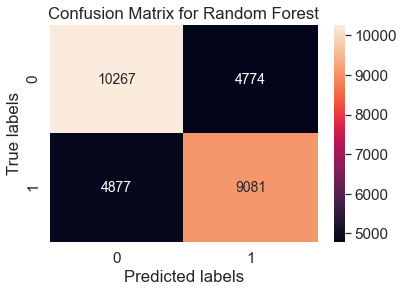

In [29]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_rf)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest'); 

# AdaBoost

In [38]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=1986)

grid = GridSearchCV(ada,parametros_rf,cv=10)

In [39]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, saida, test_size=0.3)
x_treino = x_treino.dropna()
y_treino = y_treino.dropna()

In [40]:
grid.fit(x_treino,y_treino)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(learning_rate=1, random_state=1986),
             param_grid={'n_estimators': [10, 20, 50, 100, 200, 400]})

In [41]:
grid.best_params_

{'n_estimators': 400}

In [42]:
grid.best_score_

0.6607692307692309

# AdaBoost - Prediction Rolling Windows

In [43]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=1, random_state=1986)

In [44]:
W = 10000
L = 1000
idxW = 0
idxL = idxW + W + 1

x_treino = x.iloc[idxW:W,:]
y_treino = saida.iloc[idxW:W]
x_teste =   x.iloc[idxL:(idxL+L),:]
y_teste =  saida.iloc[idxL:(idxL+L)]  
ada.fit(x_treino,y_treino)
prev_ada = ada.predict(x_teste)

idxW = idxW + L
W = idxW + 10000
idxL = idxW + 10000 + 1

for cont in range(28):
  x_treino = x.iloc[idxW:W,:]
  y_treino = saida.iloc[idxW:W]
  x_teste =   x.iloc[idxL:(idxL+L),:]
  y_teste_1 =  saida.iloc[idxL:(idxL+L)]  
  ada.fit(x_treino,y_treino)
  prev_ada_1 = ada.predict(x_teste)
  y_teste = pd.concat([y_teste,y_teste_1])  
  prev_ada = pd.concat([pd.DataFrame(prev_ada),pd.DataFrame(prev_ada_1)])
  idxW = idxW + L
  W = idxW + 10000
  idxL = idxW + 10000 + 1 

# AdaBoost - Performance

In [45]:
print(f'Accuracy:  {metrics.accuracy_score(y_teste,prev_ada):.2f}')
print(f'Precision: {metrics.precision_score(y_teste,prev_ada):.2f}')
print(f'Recall:    {metrics.recall_score(y_teste,prev_ada):.2f}')
print(f'F-1 Score: {metrics.f1_score(y_teste,prev_ada):.2f}')
print(f'AUC:       {metrics.roc_auc_score(y_teste,prev_ada):.2f}')

Accuracy:  0.66
Precision: 0.65
Recall:    0.62
F-1 Score: 0.64
AUC:       0.66


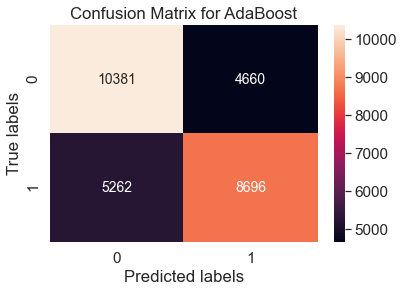

In [46]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_ada)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for AdaBoost'); 

# Naive Bayes

In [47]:
gnb = GaussianNB()


# Naive Bayes - Prediction Rolling Windows

In [48]:
W = 10000
L = 1000
idxW = 0
idxL = idxW + W + 1

x_treino = x.iloc[idxW:W,:]
y_treino = saida.iloc[idxW:W]
x_teste =   x.iloc[idxL:(idxL+L),:]
y_teste =  saida.iloc[idxL:(idxL+L)]  
gnb.fit(x_treino,y_treino)
prev_gnb = gnb.predict(x_teste)

idxW = idxW + L
W = idxW + 10000
idxL = idxW + 10000 + 1

for cont in range(28):
  x_treino = x.iloc[idxW:W,:]
  y_treino = saida.iloc[idxW:W]
  x_teste =   x.iloc[idxL:(idxL+L),:]
  y_teste_1 =  saida.iloc[idxL:(idxL+L)]  
  gnb.fit(x_treino,y_treino)
  prev_gnb_1 = gnb.predict(x_teste)
  y_teste = pd.concat([y_teste,y_teste_1])  
  prev_gnb = pd.concat([pd.DataFrame(prev_gnb),pd.DataFrame(prev_gnb_1)])
  idxW = idxW + L
  W = idxW + 10000
  idxL = idxW + 10000 + 1 

# Naive Bayes - Performance

In [49]:
print(f'Accuracy:  {metrics.accuracy_score(y_teste,prev_gnb):.2f}')
print(f'Precision: {metrics.precision_score(y_teste,prev_gnb):.2f}')
print(f'Recall:    {metrics.recall_score(y_teste,prev_gnb):.2f}')
print(f'F-1 Score: {metrics.f1_score(y_teste,prev_gnb):.2f}')
print(f'AUC:       {metrics.roc_auc_score(y_teste,prev_gnb):.2f}')

Accuracy:  0.56
Precision: 0.65
Recall:    0.17
F-1 Score: 0.27
AUC:       0.54


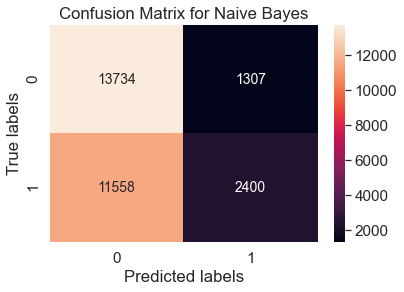

In [50]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_gnb)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Naive Bayes'); 

# Persistência


In [121]:
 import joblib

In [122]:
joblib.dump(knn,'knn_model')
joblib.dump(gnb,'gnb_model')
joblib.dump(rbf_svc,'svm_model')
joblib.dump(rf,'rf_model')
joblib.dump(ada,'ada_model')

['ada_model']

In [85]:
model = joblib.load('knn_model')
resultados = model.predict(x_teste)

In [86]:
print(resultados)

[1 0 0 ... 0 1 1]


# Conclusions

<div align="justify">We reproduce the experiments carried out by Fernandes et al. [1] Using five Machine Learning models to Classify a News Article as Popular or Unpopular. We found that the best model is the Random Forest with an accuracy of 67%, precisely as in the article. However, the AUC metric was 0.67 instead of the 0.73  found in the article.<br>

We also noticed the difference in the performance of the KNN and SVM models. A possible explanation is that the partitions performed were not the same, and some possible optimization of the code we stopped doing. However, the main result was marked; we hope that this code will be useful for those who wish to study the Data Set and go deeper into the models. </div>


# References

<div>[1] K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.</div>